In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.utils import shuffle

def get_data():
    df = pd.read_csv('ecommerce_data.csv')
    data = df.as_matrix()
    
    X = data[:, :-1]
    Y = data[:, -1]
    
    X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean())/X[:,2].std()
    
    N,D = X.shape
    X2 = np.zeros((N, D+3 )) #4 categorical variables
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1
    
    Z = np.zeros((N,4))
    Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
    
    #X2[:-4:] = Z
    assert(np.abs(X2[:,-4:] - Z).sum() < 10e-10)
    
    return X2, Y

def y2indicator(y, K):
    #K is number of classes
    N = len(y)
    ind = np.zeros((N,K))
    for i in range(N):
        ind[i,y[i]] = 1
    return ind


0 0.353985557255 0.3565328069
1000 0.0821096538259 0.121491899317
2000 0.0772093463744 0.119955096062
3000 0.0753994746298 0.120192107441
4000 0.0744747021523 0.120761958303
5000 0.0739201705216 0.121386638988
6000 0.0735543097581 0.121991632749
7000 0.0732972102753 0.122555598407
8000 0.0731083065567 0.123074020869
9000 0.0729648386346 0.123548190721
Final train classification rate: 0.925
Final test classification rate: 0.85


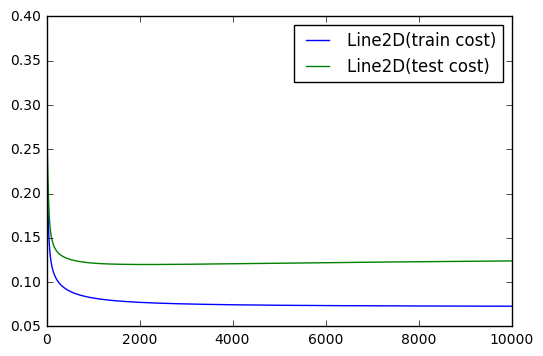

In [12]:
X,Y = get_data()
X,Y = shuffle(X,Y)
Y = Y.astype(np.int32)
D = X.shape[1]
K = len(set(Y))

Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain,K)

Xtest = X[-100:]
Ytest = Y[-100:]
Ytest_ind = y2indicator(Ytest,K)

W = np.random.randn(D,K) #distribution weights
b = np.zeros(K)

def softmax(a):
    expA = np.exp(a)
    return expA/expA.sum(axis=1, keepdims=True)

def forward(X,W,b):
    return softmax(X.dot(W)+b)

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

def classification_rate(Y,P):
    return np.mean(Y==P)

def cross_entropy(T,pY):
    return -np.mean(T*np.log(pY))

train_costs = []
test_costs = []
learning_rate = 0.001

for i in range(10000):
    pYtrain = forward(Xtrain,W,b)
    pYtest = forward(Xtest,W,b)
    
    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind,pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    W -= learning_rate*Xtrain.T.dot(pYtrain-Ytrain_ind)
    b -= learning_rate*(pYtrain-Ytrain_ind).sum(axis=0)
    if i % 1000 == 0:
        print (i, ctrain, ctest)
print("Final train classification rate:", classification_rate(Ytrain, predict(pYtrain)))
print("Final test classification rate:", classification_rate(Ytest, predict(pYtest)))

legend1, = plt.plot(train_costs, label = 'train cost')
legend2, = plt.plot(test_costs, label = 'test cost')
plt.legend([legend1, legend2])
plt.show()
#train cost is a little less than test cost
#93% accuracy on test set